In [15]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import csv
import plotly.express as px

In [16]:
df = pd.read_csv('/kaggle/input/rotatividade-de-cliente/Customer Churn.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [18]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
soma_credit_score = df.CreditScore.sum()
print(soma_credit_score)


6505288


In [20]:
Paise = df.Geography
Paise.head()

0    France
1     Spain
2    France
3    France
4     Spain
Name: Geography, dtype: object

In [21]:
genero_counts = df['Gender'].value_counts()
genero_counts.head()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

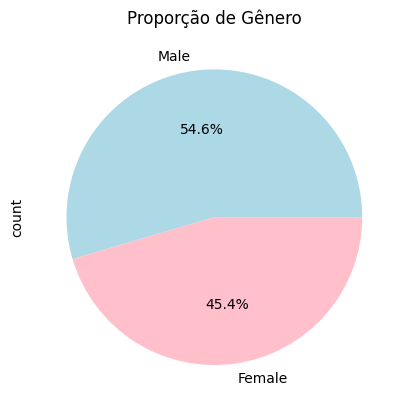

In [22]:
import matplotlib.pyplot as plt

genero_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Proporção de Gênero')
plt.show()

In [23]:
fig = px.violin(df, x = 'Gender', 
                y = 'Balance', 
                color = 'Gender', 
                  box = True, 
                points = 'all', 
                title = 'Balance Distribution by Gender')
fig.show()

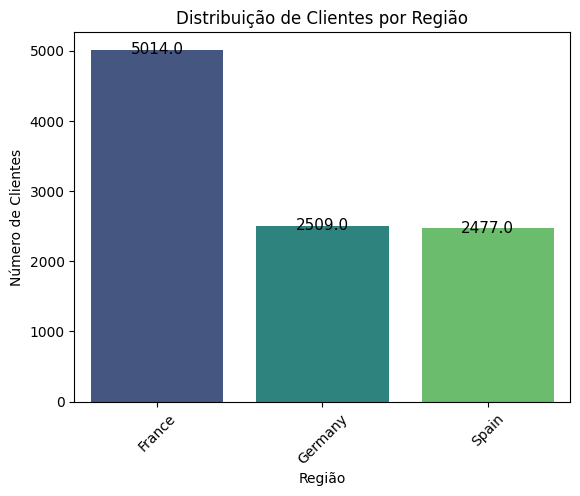

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

df_sorted = df.groupby('Geography')['Geography'].count().sort_values(ascending=False).index


sns.countplot(x='Geography', data=df, order=df_sorted, palette='viridis')
plt.title('Distribuição de Clientes por Região')
plt.xlabel('Região')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)  


for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

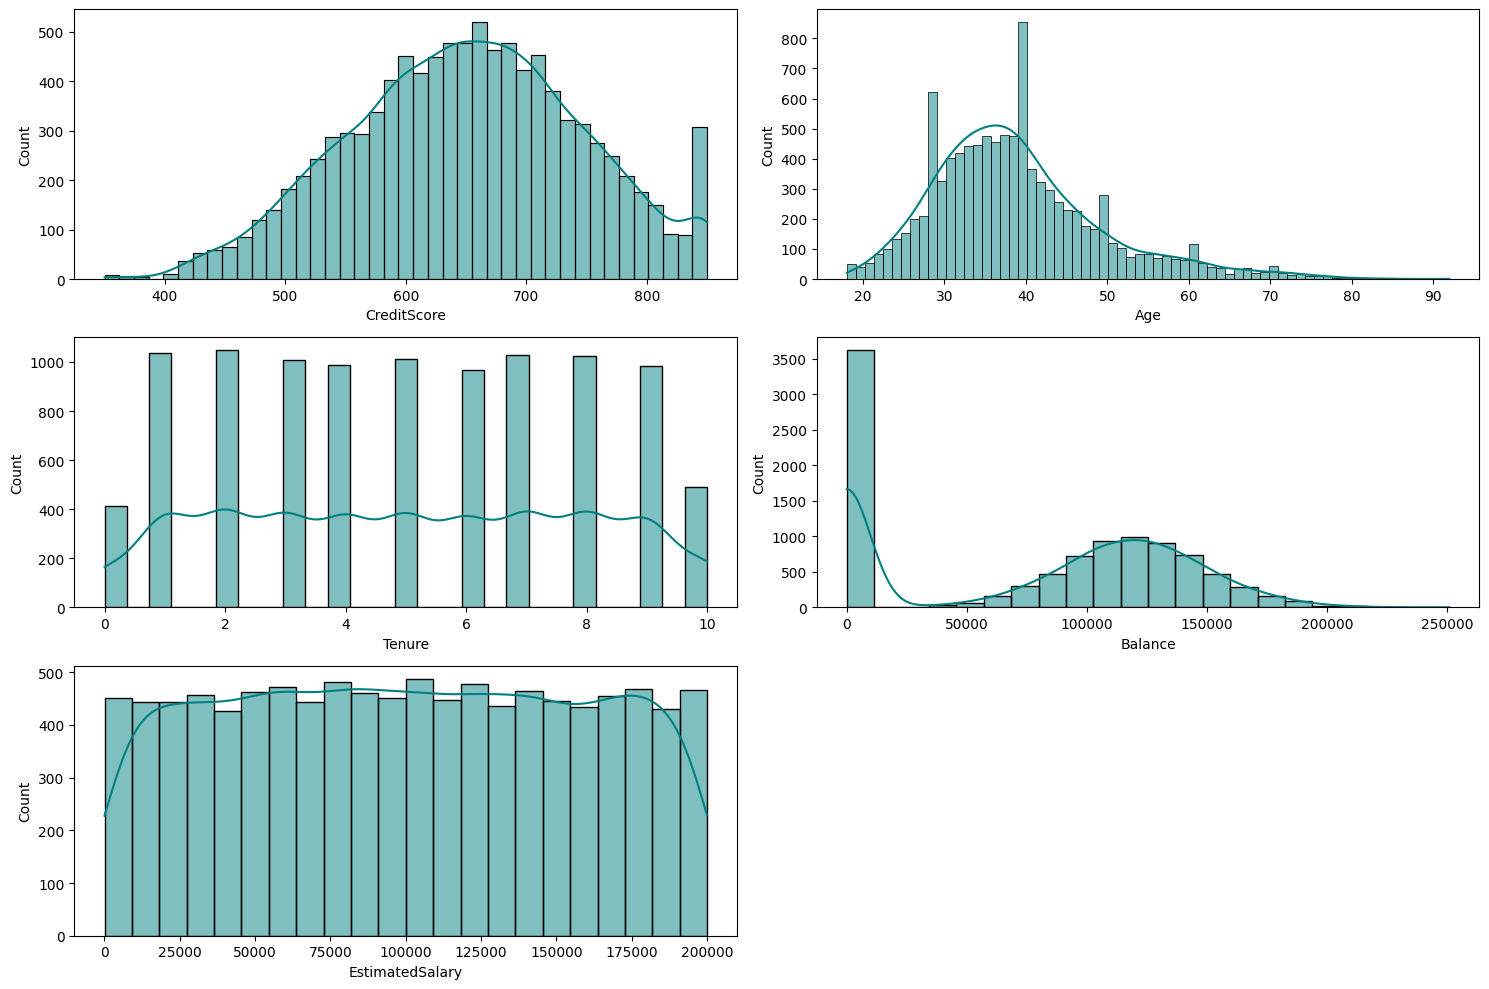

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
sns.histplot(df['CreditScore'], kde=True, ax=axes[0,0], color='teal')
sns.histplot(df['Age'], kde=True, ax=axes[0,1], color='teal')
sns.histplot(df['Tenure'], kde=True, ax=axes[1,0], color='teal')
sns.histplot(df['Balance'], kde=True, ax=axes[1,1], color='teal')
sns.histplot(df['EstimatedSalary'], kde=True, ax=axes[2,0], color='teal')
axes[2, 1].remove()
plt.tight_layout()
plt.show()

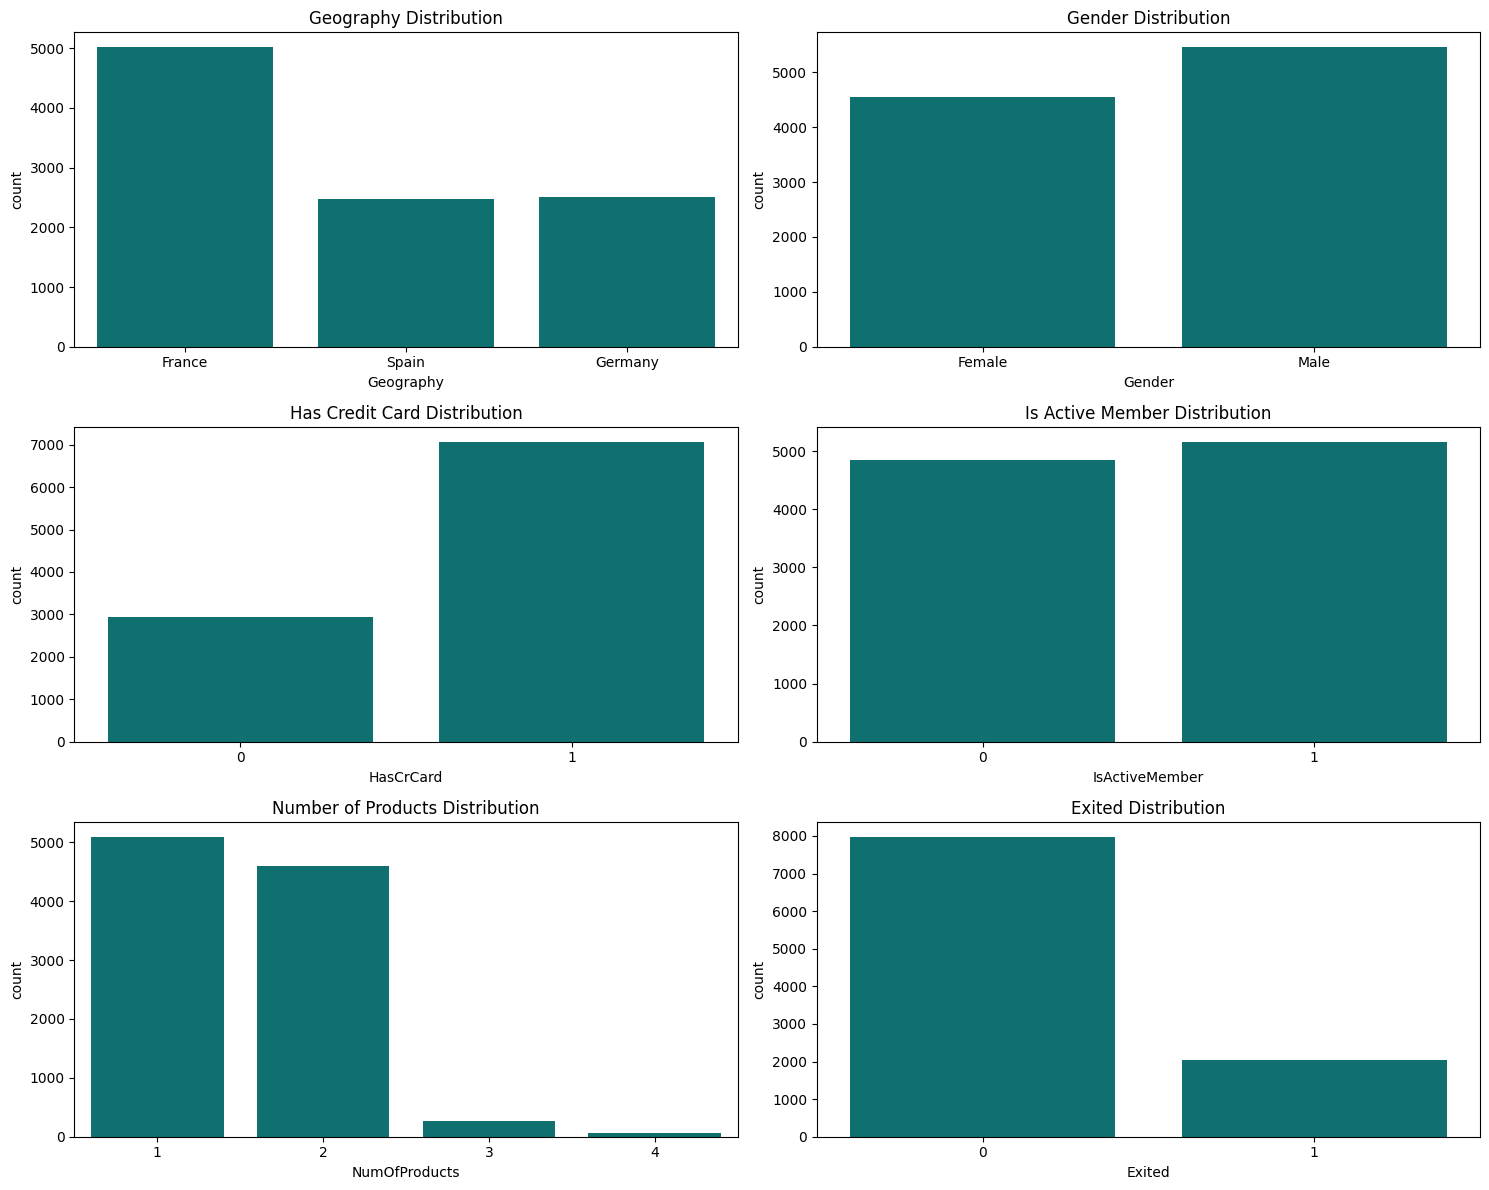

In [26]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
sns.countplot(x = 'Geography', data = df, ax = axes[0, 0], color = 'teal')
sns.countplot(x = 'Gender', data = df, ax = axes[0, 1], color = 'teal')
sns.countplot(x = 'HasCrCard', data = df, ax = axes[1, 0], color = 'teal')
sns.countplot(x = 'IsActiveMember', data = df, ax = axes[1, 1], color = 'teal')
sns.countplot(x = 'NumOfProducts', data = df, ax = axes[2, 0], color = 'teal')
sns.countplot(x = 'Exited', data = df, ax = axes[2, 1], color = 'teal')
axes[0, 0].set_title('Geography Distribution')
axes[0, 1].set_title('Gender Distribution')
axes[1, 0].set_title('Has Credit Card Distribution')
axes[1, 1].set_title('Is Active Member Distribution')
axes[2, 0].set_title('Number of Products Distribution')
axes[2, 1].set_title('Exited Distribution')
plt.tight_layout()
plt.show()

In [27]:
fig = px.scatter(df, x = 'Age', 
                 y = 'Balance', 
                 title = 'Balance vs Age', 
                 color = 'Exited')
fig.show()

In [28]:
fig = px.scatter(df, x = 'EstimatedSalary', 
                 y = 'Balance', 
                 title = 'Estimated Salary vs Balance', 
                 color = 'Exited')
fig.show()

In [29]:
fig = px.scatter(df, x = 'CreditScore', 
                 y = 'Balance', 
                 title = 'Credit Score vs Balance', 
                 color = 'Exited')
fig.show()

In [30]:
fig = px.scatter(df, 
                 x = 'Tenure', 
                 y = 'Balance', 
                 title = 'Balance vs Tenure', 
                 color = 'Exited')
fig.show()